# NSL _KDD

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('newinterdata3.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   logged_in                 125973 non-null  int64  
 1   Count                     125973 non-null  float64
 2   serror_rate               125973 non-null  float64
 3   dst_host_same_srv_rate    125973 non-null  float64
 4   dst_host_serror_rate      125973 non-null  float64
 5   dst_host_rerror_rate      125973 non-null  float64
 6   dst_host_srv_rerror_rate  125973 non-null  float64
 7   label                     125973 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 7.7 MB


In [5]:
data

,logged_in,Count,serror_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0.003914,0.0,0.17,0.00,0.05,0.00,0
1,0,0.025440,0.0,0.00,0.00,0.00,0.00,0
2,0,0.240705,1.0,0.10,1.00,0.00,0.00,1
3,1,0.009785,0.2,1.00,0.03,0.00,0.01,0
4,1,0.058708,0.0,1.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...
125968,0,0.360078,1.0,0.10,1.00,0.00,0.00,1
125969,0,0.003914,0.0,0.96,0.00,0.00,0.00,0
125970,1,0.001957,0.0,0.12,0.72,0.01,0.00,0
125971,0,0.281800,1.0,0.03,1.00,0.00,0.00,1


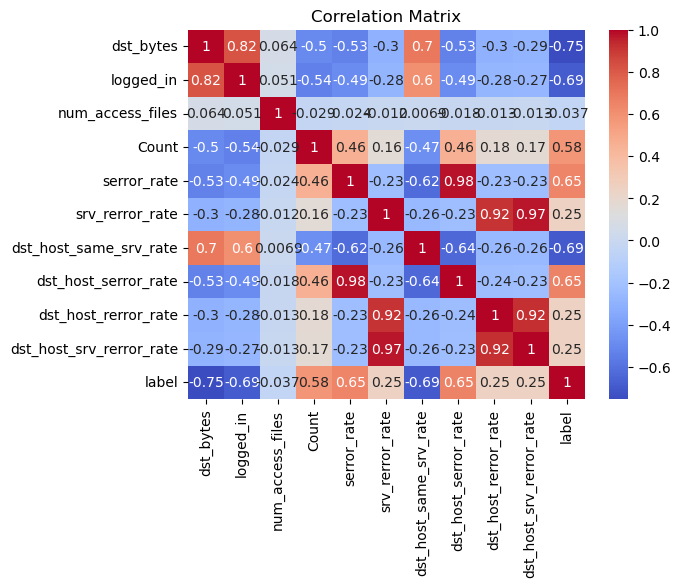

Correlated features:
label
dst_host_rerror_rate
dst_host_same_srv_rate
Count
dst_host_srv_rerror_rate
serror_rate
dst_host_serror_rate
logged_in


In [29]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Set the correlation threshold
threshold = 0.5

# Find features with correlation above the threshold
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Print the correlated features
print("Correlated features:")
for row in correlated_features:
    print(row)

In [6]:
data

,logged_in,Count,serror_rate,dst_host_same_srv_rate,dst_host_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,0.003914,0.0,0.17,0.00,0.05,0.00,0
1,0,0.025440,0.0,0.00,0.00,0.00,0.00,0
2,0,0.240705,1.0,0.10,1.00,0.00,0.00,1
3,1,0.009785,0.2,1.00,0.03,0.00,0.01,0
4,1,0.058708,0.0,1.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...
125968,0,0.360078,1.0,0.10,1.00,0.00,0.00,1
125969,0,0.003914,0.0,0.96,0.00,0.00,0.00,0
125970,1,0.001957,0.0,0.12,0.72,0.01,0.00,0
125971,0,0.281800,1.0,0.03,1.00,0.00,0.00,1


In [7]:
#Spliting and Trainning 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
y = data[['label']]
X = data.drop(['label', ], axis = 1)
  
sc = MinMaxScaler()
X = sc.fit_transform(X)
  
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(100778, 7) (25195, 7)
(100778, 1) (25195, 1)


# Decission Tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

clfd = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
# start_time = time.time()
clfd.fit(X_train, y_train.values.ravel())
print("Train score is:", clfd.score(X_train, y_train))
print("Test score is:", clfd.score(X_test, y_test))

Train score is: 0.919039869812856
Test score is: 0.9163326056757293


# GRU MODEL

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential


In [12]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical


In [13]:
from keras.layers import GRU, Dense

In [14]:
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])
# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for GRU
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Convert labels to categorical
num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Build the GRU model
model = Sequential()
model.add(GRU(64, input_shape=(1, X_train.shape[2]), activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))



Epoch 1/10
788/788 [==============================] - 10s 5ms/step - loss: 0.2096 - accuracy: 0.9205 - val_loss: 0.1718 - val_accuracy: 0.9496
Epoch 2/10
788/788 [==============================] - 3s 4ms/step - loss: 0.1627 - accuracy: 0.9444 - val_loss: 0.1576 - val_accuracy: 0.9499
Epoch 3/10
788/788 [==============================] - 3s 4ms/step - loss: 0.1523 - accuracy: 0.9477 - val_loss: 0.1503 - val_accuracy: 0.9479
Epoch 4/10
788/788 [==============================] - 3s 4ms/step - loss: 0.1461 - accuracy: 0.9491 - val_loss: 0.1454 - val_accuracy: 0.9486
Epoch 5/10
788/788 [==============================] - 3s 4ms/step - loss: 0.1418 - accuracy: 0.9500 - val_loss: 0.1425 - val_accuracy: 0.9459
Epoch 6/10
788/788 [==============================] - 3s 4ms/step - loss: 0.1382 - accuracy: 0.9512 - val_loss: 0.1403 - val_accuracy: 0.9523
Epoch 7/10
788/788 [==============================] - 3s 4ms/step - loss: 0.1351 - accuracy: 0.9526 - val_loss: 0.1363 - val_accuracy: 0.9534
Epoch

In [15]:
model.evaluate(X_test,y_test)

788/788 [==============================] - 2s 2ms/step - loss: 0.1306 - accuracy: 0.9562


[0.13059072196483612, 0.9561817646026611]

# lstm

In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Load the NSL-KDD dataset
# train_data = pd.read_csv('KDDTrain+.txt')
# test_data = pd.read_csv('KDDTest+.txt')

# # Combine train and test data for preprocessing
# data = pd.concat([train_data, test_data])

# Preprocessing
# Remove redundant features and normalize numerical features if needed
# ...

# Convert categorical labels to integers
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Split the data into features and labels
X = data.drop('label', axis=1)
y = data['label']

# Convert labels to one-hot encoded vectors
y = to_categorical(y)

# Pad sequences to the same length
X_padded = pad_sequences(X.values)

# Reshape features to fit the LSTM input shape
X_reshaped = X_padded.reshape((X_padded.shape[0], X_padded.shape[1], 1))

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the LSTM model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the LSTM model on the test data
loss, accuracy = model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)


Epoch 1/5
788/788 [==============================] - 18s 19ms/step - loss: 0.2847 - accuracy: 0.8796 - val_loss: 0.2226 - val_accuracy: 0.9075
Epoch 2/5
788/788 [==============================] - 14s 17ms/step - loss: 0.2194 - accuracy: 0.9074 - val_loss: 0.2205 - val_accuracy: 0.9075
Epoch 3/5
788/788 [==============================] - 14s 17ms/step - loss: 0.2136 - accuracy: 0.9089 - val_loss: 0.2167 - val_accuracy: 0.9076
Epoch 4/5
788/788 [==============================] - 14s 17ms/step - loss: 0.2110 - accuracy: 0.9098 - val_loss: 0.2134 - val_accuracy: 0.9076
Epoch 5/5
788/788 [==============================] - 4s 5ms/step - loss: 0.2110 - accuracy: 0.9076
Test Loss: 0.21095405519008636
Test Accuracy: 0.9076007008552551


# linear comparison graph

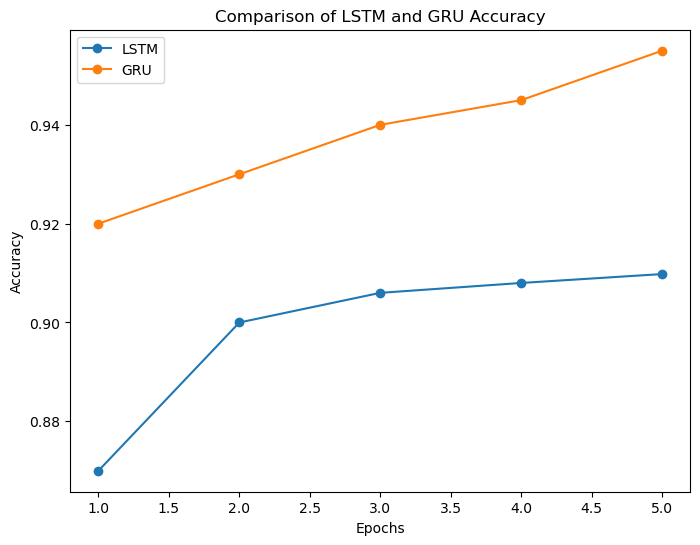

In [22]:
import matplotlib.pyplot as plt

# Specify the data for the graph
epochs = [1, 2, 3, 4, 5]  # Example epochs
lstm_accuracy = [0.87, 0.90, 0.906, 0.908, 0.9098]  # Example LSTM accuracy scores
gru_accuracy = [0.92, 0.93, 0.94, 0.945, 0.955]  # Example GRU accuracy scores

# Create the linear graph
plt.figure(figsize=(8, 6))
plt.plot(epochs, lstm_accuracy, marker='o', linestyle='-', label='LSTM')
plt.plot(epochs, gru_accuracy, marker='o', linestyle='-', label='GRU')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Comparison of LSTM and GRU Accuracy')

# Add legend
plt.legend()

# Show the graph
plt.show()
